In [1]:
from lib.Locate_ppl import Locate_ppl
from lib.Recognizer import Recognizer
from lib.PersonEmbeding import PersonEmbeding
from matplotlib import pyplot as plt
import torch
lp = Locate_ppl()
rec = Recognizer()
pe = PersonEmbeding()

Using cache found in C:\Users\artur/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub
Using cache found in C:\Users\artur/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub
Using cache found in C:\Users\artur/.cache\torch\hub\pytorch_vision_v0.5.0


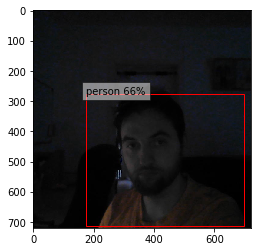

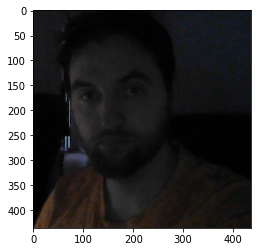

In [3]:
ppl = lp.test()

In [12]:
for p in ppl:
    print(p.shape)

(498, 498, 3)


In [13]:
with torch.no_grad():
    emb = pe.embed(ppl)

In [14]:
emb.shape

torch.Size([1, 512])

In [15]:
r = rec(emb)

In [16]:
r

tensor([[0.2903, 0.7097]], grad_fn=<SoftmaxBackward>)

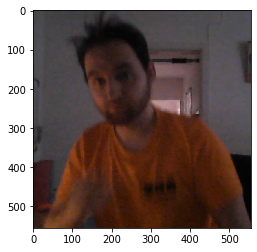

tensor([0.7608, 0.2392])


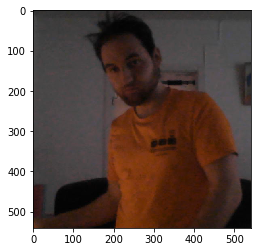

tensor([0.7839, 0.2161])


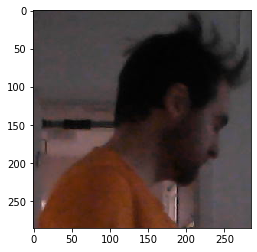

tensor([0.9037, 0.0963])


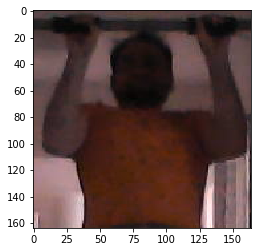

tensor([0.8946, 0.1054])


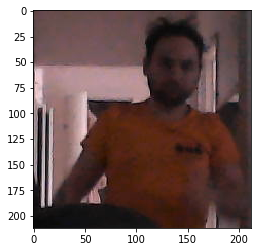

tensor([0.8644, 0.1356])


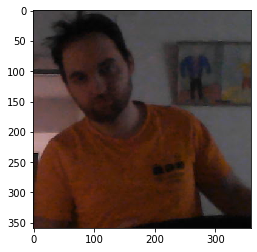

tensor([0.8069, 0.1931])


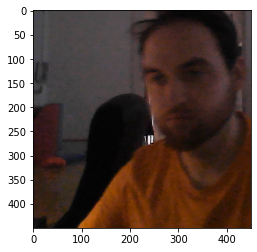

tensor([0.7947, 0.2053])


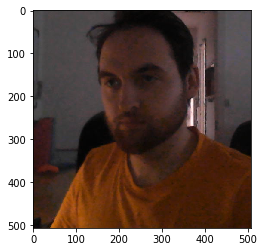

tensor([0.8184, 0.1816])


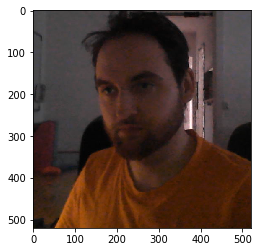

tensor([0.8341, 0.1659])


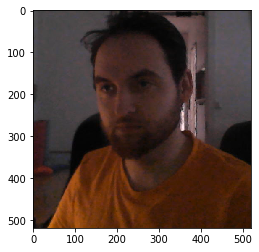

tensor([0.8233, 0.1767])


In [7]:
for img in lp:
    for i in img:
        plt.imshow(i)
        plt.show()
    
    with torch.no_grad():
        emb = pe.embed(img)
        r = rec(emb)
    for p in r:
        print(p)


In [4]:
glass_or_not = {"glass":Recognizer(),
                "no_glass":Recognizer()}
glass = []
no_glass = []

In [5]:
def get_data(data):
    for img in lp:
        for i in img:
            plt.imshow(i)
            plt.show()
        emb = pe.gen_training_emb(img)
        for e in emb:
            data.append(e)

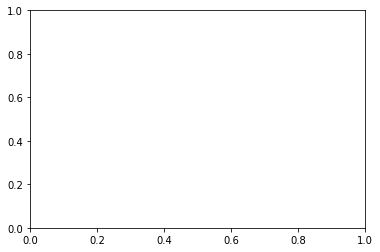

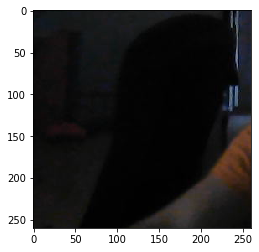

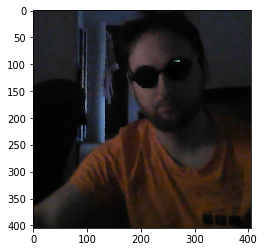

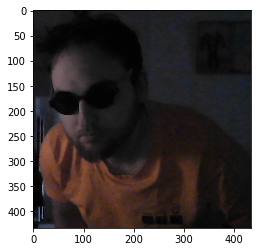

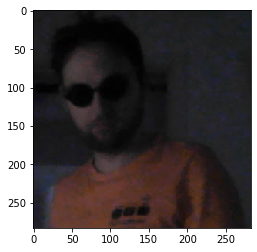

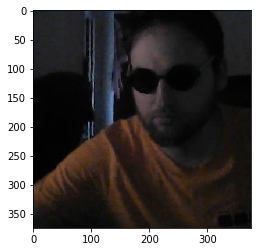

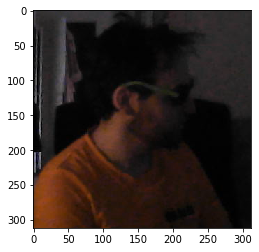

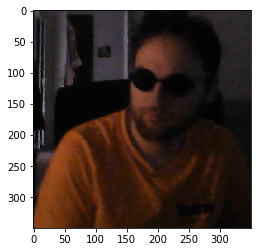

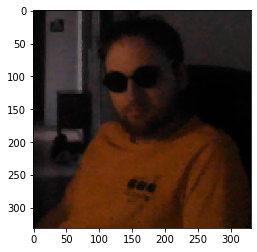

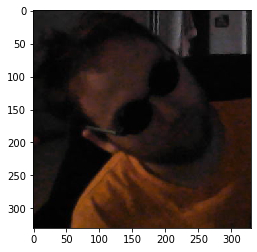

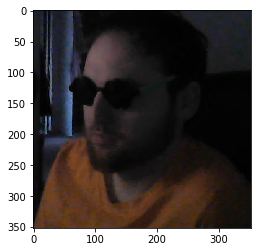

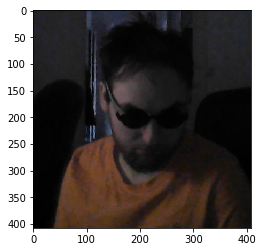

In [6]:
get_data(glass)

In [34]:
glass[0][:10]

tensor([1.4562e-01, 8.1803e-02, 8.3930e-01, 6.2673e-01, 2.9178e-01, 6.4643e-01,
        1.1389e+00, 5.4033e-04, 0.0000e+00, 8.2475e-01])

In [35]:
glass[1][:10]

tensor([0.1856, 0.0821, 1.1883, 0.4408, 0.3881, 0.3621, 0.7122, 0.0023, 0.0000,
        0.8660])

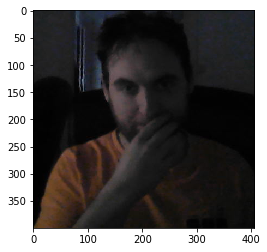

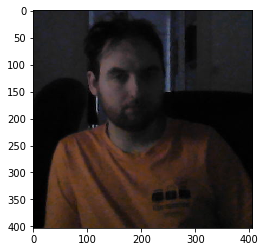

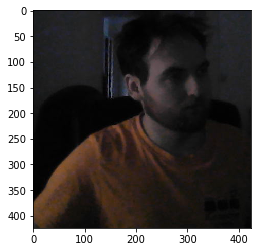

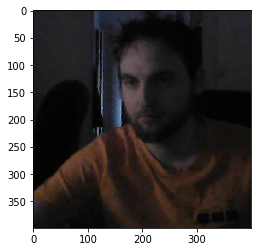

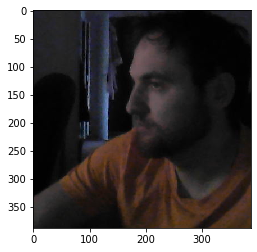

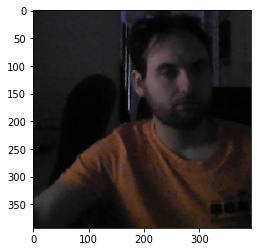

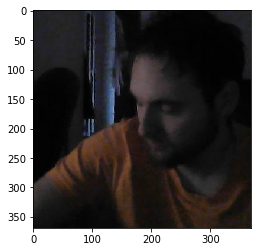

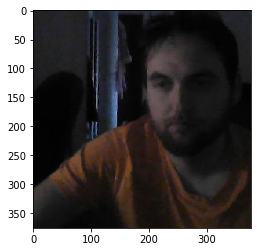

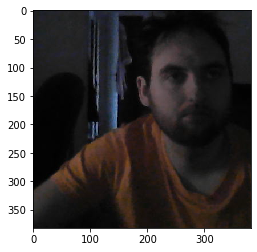

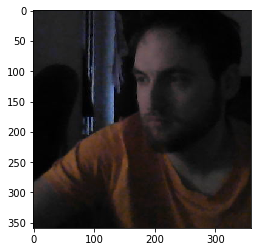

In [7]:
get_data(no_glass)

In [22]:
for i in range(10):
    glass_or_not["glass"].get_beter(glass, no_glass)

curret loss:0.0019874790989196124
curret loss:0.001931342249041173
curret loss:0.0018814043211403178
curret loss:0.0018375728557358927
curret loss:0.001798798171664352
curret loss:0.0017632009711728168
curret loss:0.0017341824665443222
curret loss:0.0017096361339981876
curret loss:0.0016764618678769068
curret loss:0.001653902755299611


In [23]:
for i in range(10):
    glass_or_not["no_glass"].get_beter(no_glass, glass)

curret loss:0.0020872934874313982
curret loss:0.0020204139122767233
curret loss:0.0019582434265471215
curret loss:0.0019057636441134696
curret loss:0.0018588653028900944
curret loss:0.001817057998989945
curret loss:0.0017793596791687296
curret loss:0.0017463503766860535
curret loss:0.0017167543519788714
curret loss:0.0016894268400188702


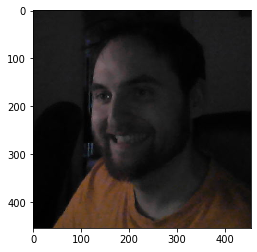

glass tensor(0.2529)
no_glass tensor(0.7497)
angry tensor(0.4495)
happy tensor(0.8158)


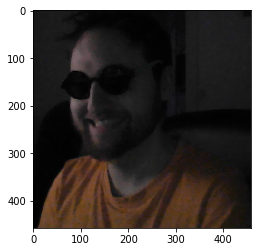

glass tensor(0.8195)
no_glass tensor(0.2598)
angry tensor(0.0986)
happy tensor(0.4833)


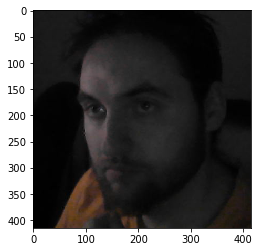

glass tensor(0.3391)
no_glass tensor(0.6477)
angry tensor(0.2097)
happy tensor(0.4430)


In [36]:
for img in lp:
    for i in img:
        plt.imshow(i)
        plt.show()
    
    emb = pe.embed(img)
    for name, reco in glass_or_not.items():
        r = reco(emb)
        for p in r:
            print(name, p[1])
    msg = input("press enter for next:")
    if len(msg) > 1:
        break

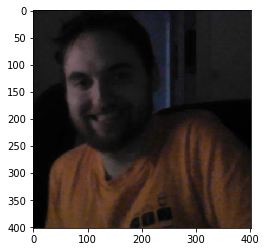

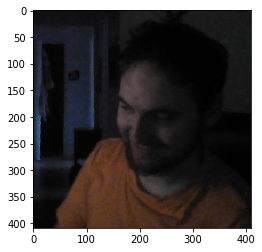

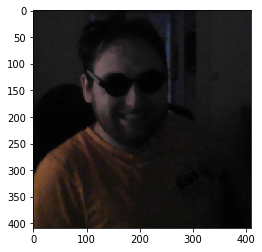

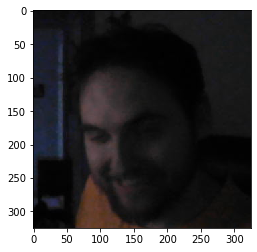

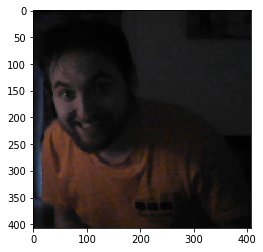

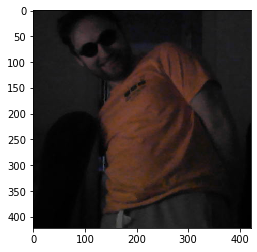

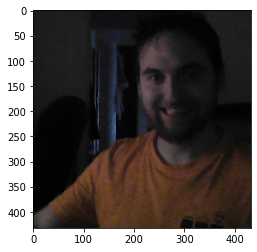

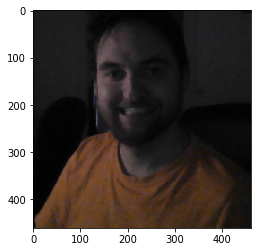

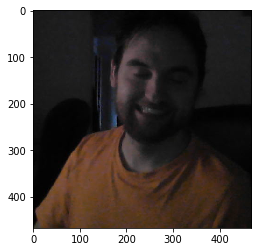

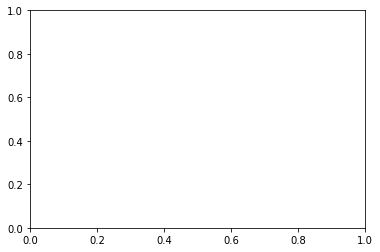

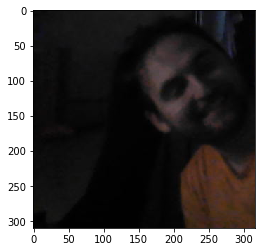

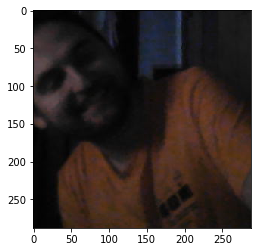

In [30]:
glass_or_not["happy"] = Recognizer()
happy = []
get_data(happy)

In [35]:
for i in range(10):
    glass_or_not["happy"].get_beter(happy, glass + no_glass)

curret loss:0.0016229396463606923
curret loss:0.0016065869268955782
curret loss:0.0015922216899007734
curret loss:0.0015775072014728405
curret loss:0.0015634166335581332
curret loss:0.0015508528514500933
curret loss:0.0015383734096228027
curret loss:0.0015274179869726912
curret loss:0.0015161330474507786
curret loss:0.0015061828444498625
